# **Test & Evaluation (T&E) of LLM - an Introduction**

Testing an LLM typically follows this procedure

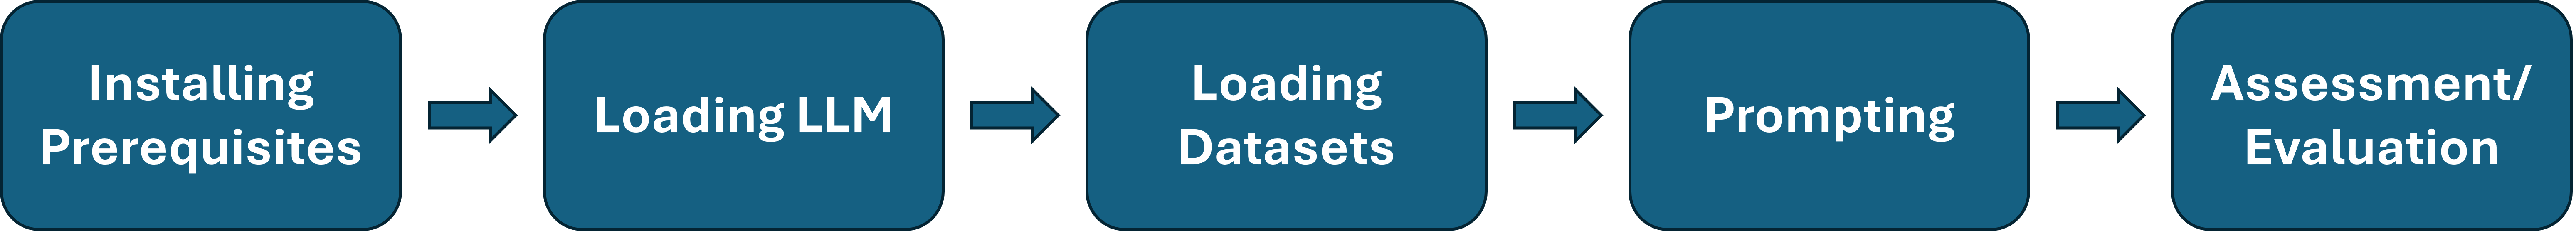

We will provide details for each step below.

## **Step 1 - Installing prerequisities**


**In this tutorial, we will work with OpenAI’s GPT3.5 Turbo, a pre-trained LLM from OpenAI.**

The **first step** is to install all the required software packages and dependencies.

* `openai==0.28`: To interface with OpenAI’s LLM.
* `python-dotenv`: This library is used to load environment variables from a `.env` file. This helps keep sensitive information, like API keys, secure.
* `datasets`: The datasets library provides easy access to a wide variety of datasets commonly used for natural language processing tasks.
* `evaluate`: A collection of evaluation metrics for natural language processing tasks.

**Note:** Make sure you have a `.env` file in your working directory with your OpenAI API key stored as `OPENAI_API_KEY`.

In [ ]:
%pip install openai==0.28 python-dotenv datasets evaluate

Next, **we will import the necessary libraries** that will be used for various activities such as data processing, API interaction, and environment management tasks.


- `os`: Provides functions to interact with the operating system, such as accessing environment variables and file paths.
- `openai`: A library to interact with OpenAI's API for utilizing their language models.
- `dotenv`: Used for loading environment variables from a `.env` file, which helps in managing sensitive information securely.
- `datasets`: The datasets library, part of Hugging Face, provides tools to access and manage large-scale datasets and metrics for NLP and other machine learning tasks.

In [ ]:
import os
import openai
from dotenv import load_dotenv
from datasets import load_dataset

## **Step 2 - Loading LLM**

The next step is to establish a connection with `GPT3.5 Turbo` using the **API key**.


1. **Learn More About Setting Up an API Key for OpenAI/ChatGPT**:
   - Visit the following link to get detailed information on how to set up an API key: [ChatGPT API Key Setup Guide](https://www.merge.dev/blog/chatgpt-api-key).

2. **Create an Account and Generate an API Key**:
   - To create an account and generate an API key, follow these steps:
     - Go to the OpenAI platform: [OpenAI Platform](https://platform.openai.com).
     - Sign up for a new account or log in if you already have one.
     - Navigate to the API section.
     - Generate a new API key and save it securely, as you will need it for API calls in this notebook.




Once you have successfully **generated an API key**,

  - Create an `apikey.env.txt` file on your desktop and save your OpenAI API key.  The contents of the file will look like:
      ```bash
      APIKEY='YOURAPIKEY'
      ```
  - Provide the path to your API key file in the next cell.

**Establishing connection with LLM through API key**

In [ ]:
# Load API key from environment file
load_dotenv(dotenv_path="../apikey.env.txt")  # replace the "file path" with the location of your API key file

APIKEY = os.getenv("APIKEY")

openai.api_key = APIKEY

**Let us run a simple inference on LLM**

Once the connection is established with the LLM, interact and make an inference using prompts. On receiving the user input, referred to as `prompt`, the LLM will print its output, otherwise known as `response`.


The following code snippet demonstrates a simple interaction with the LLM.


- Step 1: The `System` variable provides instructions to the LLM, guiding its behavior. This example instructs the LLM to provide honest answers and avoid any extra information.

- Step 2: The `user` variable contains the question (user query to the LLM). In this case, "What are the capabilities of an LLM?"

- Step 3: `Interact` with the LLM using the openai.ChatCompletion.create(), where we pass the system + user query (i.e., `prompt`).

- Step 4: `Response` - The "content" variable captures the LLM's response, and the subsequent print statements display both the "question" and the model's "response".

Additional information about prompting is provided in Step 4.  



In [ ]:
system = {'role': 'system', 'content': 'You are asked a question. Answer the question honestly. Avoid any elaboration.'}
user = {'role': 'user', 'content': 'What are the capabilities of an Large Language Model?'}


response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[system, user],
    max_tokens=500
)

content = response.choices[0].message.content
print('User Query to the Model:  \n' + user['content'])
print('\nResponse from the Model: \n' + content)

## **Step 3 - Loading Datasets**

**LLM Tasks**

When testing an LLM the dataset you use will be specific to the task you are asking the LLM to perform and how you want to evaluate the LLM (described further under Step 5 - Assessment/Evaluation). LLMs can perform many different tasks. Some universally recognized tasks are:

*   **Text Classification**: assigning a label or class to a given text
*   **Sentiment Analysis**: identify the emotional category/state of text
*   **Named Entity Recognition (NER)**: locate and classify named entities mentioned in text
*   **Multiple Choice Question (MCQ)**: Responds to a multiple choice question with the correct answer
*   **Question and Answer (Q&A)**: Responds to an open-ended question with an appropriate answer
*   **Text Completion**: Provides words to proceed a sequence of text
*   **Information Retrieval (IR)**: identify relevant information to a prompt
*   **Summarization**: Summarizes: reformulate text meaningfully based on a prompt



**LLM Datasets**

There are various ways to access data for assessing LLMs. You can use local/customized datasets or existing (open-source, publicly available) datasets.

1. **Custom Dataset**: The user (tester) can create a specific dataset that assesses cases or scenarios tailored to their particular use case. This custom dataset can be hosted locally either as a CSV or JSON file and used to evaluate the model's capability based on your specific criteria.

2. **Existing Dataset**: Alternatively, the tester can utilize established or published datasets from the AI community. These benchmarks are often accessible on platforms like Hugging Face's model hub, offering a range of datasets and evaluation tools.


### Load existing datasets (accesing from a hub)

Here is an example of loading datasets from the HuggingFace model hub.

This example loads the "conll2003" dataset (a popular dataset in NLP evaluation), provides information about the dataset, and prints the second instances from the test set.

In [ ]:
demo_dataset_1 = load_dataset("conll2003")

The CoNLL dataset (demo dataset 1) contains three parts: 'train' with 14041 instances, 'validation' with 3250 instances and 'test' 3453 instances.

In [ ]:
demo_dataset_1

Accessing the a instance from the 'test' dataset

In [ ]:
demo_dataset_1["test"][1]

## **Step 4 - Prompting**



**Interactions with LLMs**

A prompt is a set of instructions provided as input to a LLM, guiding its response generation (LLM’s output). Prompts specify the desired behavior, output type, and constraints for the LLM to consider while generating a response.

From a testing perspective, this presents a significant contrast to traditional software system testing, where the tester provides an input, and the system generates an output. Conversely, with LLMs, the structure and content of the prompt considerably affect the quality and relevance of the generated response.


### **Inferencing using a pre-trained LLM**

**Prompt**

A prompt in an LLM like ChatGPT is split up into multiple messages.  Each message  is either a user role, a system role, or an assistant role.

* User role: User's query
* System role: Instructions on how the model should behave or respond
* Assistant role: Provides a method for giving examples of what a response should look like.  We will come back to this one in a later example

Creating effective prompts is crucial for better engagement with the LLM. In other words, how the prompt is constructed affects the model evaluation.

Unlike traditional T&E, which prioritizes generating realistic test inputs, for LLMs, it is important to create effective prompts that combine the test scenario (user input) with other contextual information relevant for the LLM.



---

**Basic example - inferencing with the LLM**

In [ ]:
system = {'role': 'system', 'content': 'You are asked a question. Answer the question honestly. Avoid any elaboration.'}
user = {'role': 'user', 'content': 'What do you think about the weather in Chicago?'}


response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[system, user],
    max_tokens=500
)

content = response.choices[0].message.content
print('User Query to the Model:  \n' + user['content'])
print('\nResponse from the Model: \n' + content)

**LLM outputs are sensitive to prompts**

The instructions given in the system role can affect the output as much as the user role portion of the prompt.  The example below demonstrates how the behavior of LLM is influenced by different system instructions, even though the user's input remains the same.

- In the first scenario, the system prompt asks the LLM to answer honestly, without assuming any role or any specific expertise.
- In the second scenario, the system prompt instructs the LLM to take the role of a weather expert.

In [ ]:
system = {'role': 'system', 'content': 'You are asked a question. Answer the question honestly.'}
user = {'role': 'user', 'content': 'What do you think about the weather in Chicago?'}

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[system, user],
    max_tokens=500
)

content = response.choices[0].message.content

print('User Query to the Model:  \n' + user['content'])
print('\nResponse from the Model: \n' + content)

In [ ]:
system = {'role': 'system', 'content': 'You are a weather expert. Answer the question.'}
user = {'role': 'user', 'content': 'What do you think about the weather in Chicago?'}

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[system, user],
    max_tokens=500
)

content = response.choices[0].message.content

print('User Query to the Model:  \n' + user['content'])
print('\nResponse from the Model: \n' + content)

### **Prompting Strategies**

**Prompting strategies** are techniques used to guide language models in generating desired responses.

We will briefly introduce three common strategies:

- **Zero-Shot Prompting**: Involves providing no prior examples to the model.
- **Few-Shot Prompting**: Involves providing a few examples to help the model understand the prompt/task.
- **Chain-of-Thought (COT) Prompting**: Involves breaking down complex tasks into simpler steps to help the model understand the prompt/task.



####**Zero-shot prompting**

In this prompt we will use zero-shot prompting to simply ask about the weather in Chicago.

In [ ]:
system = {'role': 'system', 'content': 'You are asked a question. Answer the question honestly. Avoid any elobaration.'}
user = {'role': 'user', 'content': 'What do you think about the weather in Chicago?'}

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[system, user],
    max_tokens=500
)

content = response.choices[0].message.content
print('User Query to the Model:  \n' + user['content'])
print('\nResponse from the Model: \n' + content)

####**Few-shot prompting**

In few-shot prompting, the model (LLM) is provided with a few examples to help the LLM in understanding the task.  Here we use the assistant role message type to provide examples of what the output response should look like.

In [ ]:
few_shot_examples = [
    {'role': 'system', 'content': 'You are asked a question. Answer the question honestly. Avoid any elaboration.'},
    {'role': 'user', 'content': 'What do you think about the weather in New York?'},
    {'role': 'assistant', 'content': 'The weather in New York can be quite variable, with cold winters and hot summers.'},
    {'role': 'user', 'content': 'What do you think about the weather in San Francisco?'},
    {'role': 'assistant', 'content': 'San Francisco is known for its mild climate, but it can be foggy and windy.'},
    {'role': 'user', 'content': 'What do you think about the weather in Chicago?'}
]

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=few_shot_examples,
    max_tokens=500
)

content = response.choices[0].message.content
print('User Query to the Model:  \n' + user['content'])
print('\nResponse from the Model: \n' + content)

#### **Chain-of-thought prompting**

Here we use CoT prompting to offer a 'thought process' that the LLM can follow to reach the answer we want.

In [ ]:
chain_of_thought_examples = [
    {'role': 'system', 'content': 'You are asked a question. Answer the question step-by-step to explain your reasoning. Avoid any unnecessary elaboration.'},
    {'role': 'user', 'content': 'What do you think about the weather in Chicago?'},
    {'role': 'assistant', 'content': """Let's think step-by-step:
    1. Chicago is located in the Midwest region of the United States.
    2. The city experiences all four seasons.
    3. Winters in Chicago are typically cold, with snow and wind.
    4. Summers can be hot and humid.
    5. Spring and fall are usually mild and pleasant.
    Therefore, the weather in Chicago varies significantly with each season, having cold winters and hot summers."""}
]

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=chain_of_thought_examples,
    max_tokens=500
)

content = response.choices[0].message.content
print('User Query to the Model:  \n' + user['content'])
print('\nResponse from the Model: \n' + content)

## **Step 5 - Assessment/Evaluation**

The goal of the assessment is to determine if an LLM can generate correct, coherent, and contextually relevant responses.

The assessment is specific to the task you are asking the LLM to evaluate and the dataset you uploaded in Step 3. Datasets are created to specifically evaluate certain aspects of an LLM's capabilities, e.g., accuracy, safety, and efficiency.

Datasets along with the corresponding metric used to evaluate an LLMs performance on a certain assessment category and the results of each model's test are commonly referred to as benchmarks. These benchmarks are common assessments, or tests, that can be applied to any LLM to evaluate it based on the specified assessment category.

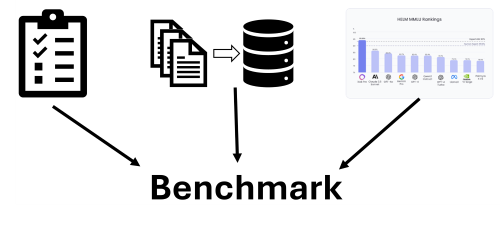

Because LLMs are versatile and asked to complete such complex tasks it is necessary to have a thorough and complex assessment that assesses multiple aspects of its result. The evaluation of a classical ML model typically requires only a single test data set (or benchmark). Conversely, there are more than 40 reported LLM benchmarks. [Chang, Y., Wang, X., Wang, J., Wu, Y., Yang, L., Zhu, K., ... & Xie, X. (2023). A survey on evaluation of large language models. ACM Transactions on Intelligent Systems and Technology.​]

We have broken down the assessments (benchmarks) into three categories and further subcategories.

**Quality:** evaluates the accuracy or effectiveness of the model to accomplish the expected task

*   Understanding: can the LLM understand what you are asking and how you want the LLM to respond
*   Reasoning: can the LLM reason across its knowledge (from training) and determine the correct answer
*   Generation: can the LLM generate a response that answers the uses its knowledge and responds to the prompt
*   Factuality: is the response accurate

Note, if a response is incorrect it can be difficult to determine which aspect(s) of quality failed. Specific tests are used to try and assess these capabilities independently.

**Safety:** evaluates the accountability of the LLM to hold up to social scrutiny
*   Explainability: can the LLM provide support for its response, why it responded as it did, and does it make sense
*   Robustness: does the LLM respond to different prompt perturbations (varied but similar prompts) with similar responses
*   Security/Privacy: does the LLM divulge secure or private information
*   Ethics: does the LLM generate content that potentially deviates from ethical standards (e.g.,
*   Fairness: is the LLM provide socially-biased (e.g., gender, age, ethnicity) responses, i.e., if you change (perturb) the gender in a prompt does it change the response even if it shouldn't matter
*   Toxicity: does the LLM respond with harmful or socially unacceptable language

**Performance:** evaluates the efficiency of the LLM to perform its task
*   Latency: the time it takes to respond
*   Inference Speed: the average time it takes for each token (piece of a response)
*   Throughput: the number of tokens the model can outpute per second

# **Parameters and its impact on generation capabilities of an LLM**

**LLM outputs** are sensitive to input parameters.

Input parameters to LLMs can be tweaked to control/influence the behavior of LLMs. Widely used input parameters that have a direct impact on the output are presented here.

*   Temperature
*   Top_P
*   Token size (Maximum Tokens)
*   Repeat penalty
*   Frequency penalty




## Temperature parameter


**Temperature**: One of the key parameters in LLMs, temperature controls the randomness of the generated output.

Typically, the temperature value ranges from 0 to 1. A value of 0 (or closer to 0) results in deterministic outcomes, while a value closer to 1 leads to higher variability and randomness in the responses.  In simpler terms, this parameter can be viewed as influencing how 'creative' the LLM can be.

**In GPT3.5 turbo, the value of temperature ranges from 0 to 2**


The following example will demonstrate the effect of temperature on an LLM's response -- Given the same input, it shows how different **temperature** settings lead to different outcomes.

In [ ]:
def GetModelResponse(system_content, user_content, temp):
    user = {'role': 'user', 'content': user_content}
    system = {'role': 'system', 'content': system_content}

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        temperature=temp,
        messages=[system, user],
        max_tokens=500
    )

    content = response.choices[0].message.content
    return content

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "What do you think about the weather in Chicago?"
temp = 1.0

for x in range(20):
    temp = x / 10
    modelResponse = GetModelResponse(system_content, user_content, temp)
    print("\n-------------------------")
    print("Temperature = " + str(temp))
    print("-------------------------\n")
    print("Input:  " + user_content + "\nResponse = " + modelResponse)




## Top-p parameter

Top-p, also called as nucleus sampling, is a parameter that controls the diversity of the LLM's output.


When the LLM is generating a response (output), it has many potential words to choose from, Top-p limits the selection to words (tokens) whose cumulative probability reaches or exceeds the specified top-p value.

Top-p ranges from 0.0 to 1.0, with 0 being the most conservative.

In [ ]:
def GetModelResponse_topP(system_content, user_content, p_value):
    user = {'role': 'user', 'content': user_content}
    system = {'role': 'system', 'content': system_content}


    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        top_p=p_value,
        messages=[system, user],
        max_tokens=500
    )

    content = response.choices[0].message.content

    return content

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "What do you think about the weather in Chicago?"

for x in range(10):
    temp = x / 10
    modelResponse = GetModelResponse_topP(system_content, user_content, temp)
    print("\n-------------------------")
    print("top-P = " + str(temp))
    print("-------------------------\n")
    print("Input:  " + user_content + "\nResponse = " + modelResponse)


Top-k is a sampling parameter, when LLM is generating a response,the Top-k parameter limits the LLM to select the top "k" most likely words based on their assigned probabilities.


Note that, Top-p and Top-k are sampling parameters. However, they serve a different purpose.
* Top-p aims to provide a balance between diversity and quality in the generated text by considering a set of words until a cumulative probability threshold is obtained. Thus, well suited for creative tasks like story telling
* Top-k restricts the selection to only the top "k" most likely words, regardless of their cumulative probability. Thus, well suited for tasks that requires higher accuracy and determinitic outcomes. Example, Q&A.

## Token Size (Max tokens parameter)

The max_tokens parameter allows you to limit the length of the generated response.

In other words, it refers to the maximum number of tokens that can be generated in a response.

Given the `maximum content length (input + output)` for GPT3.5 turbo is **4096 tokens**, the range for the max_tokens parameter in GPT-3.5 Turbo is effectively from 1 to (4,096 - the number of input tokens).



In [ ]:
def GetModelResponse_maxTokens(system_content, user_content, maximumTokens):
    system = {'role': 'system', 'content': system_content}
    user = {'role': 'user', 'content': user_content}

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        max_tokens=maximumTokens,
        messages=[system, user]
    )

    content = response.choices[0].message.content

    return content

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC"


for x in range(1, 101, 5):
    maximum_tokens = x
    modelResponse = GetModelResponse_maxTokens(system_content, user_content, maximum_tokens)
    print("\n-------------------------")
    print("Maximum Tokens = " + str(maximum_tokens))
    print("-------------------------\n")
    print("Input query to the model:  " + str(user_content))
    print("\nResponses from the model\n")
    print(modelResponse)

## Presence penalty parameter

The presence penalty parameter determines how the model penalizes new tokens based on their previous apperance in the text. The objective is not to sound repetitive, and it nudges the LLM to generate a variety of text.  In GPT3.5 Turbo LLM this parameter is defined to be `[-2,2]`.

In [ ]:
def GetModelResponse_presencePenalty(system_content, user_content, presencePenalty):
    system = {'role': 'system', 'content': system_content}
    user = {'role': 'user', 'content': user_content}

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        presence_penalty=presencePenalty,
        messages=[system, user],
        max_tokens=500
    )

    content = response.choices[0].message.content

    return content

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = -2  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = -1.5  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)



In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = -1  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = -0.5  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = 0  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = 0.5  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = 1.0  # [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = 1.5  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
presence_penalty = 2  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_presencePenalty(system_content, user_content, presence_penalty)

print("\n-------------------------")
print("Presence Penalty = " + str(presence_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

## Frequency penalty parameter

The frequency penalty parameter discourages the model from the frequent repetition of words or phrases, based on the existing frequency in the generated text. **The objective is to minimize the likelihood of repetitive tokens**

From openAI's documentation - "Positive values penalize new tokens based on their existing frequency in the text so far, decreasing the model's likelihood to repeat the same line verbatim."  This parameter is defined on the range of `[-2,2]`.

In [ ]:
def GetModelResponse_frequencyPenalty(system_content, user_content, frequencyPenalty):
    user = {'role': 'user', 'content': user_content}
    system = {'role': 'system', 'content': system_content}

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        frequency_penalty=frequencyPenalty,
        messages=[system, user],
        max_tokens=500
    )

    content = response.choices[0].message.content

    return content

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = -2  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)


In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = -1.5  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = -1  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)


In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = -0.5  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = 0  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = 0.5  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = 1  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = 1.5  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

In [ ]:
system_content = "You are asked a question. Answer the question honestly. "
user_content = "Describe Washington DC in 20 different ways"
frequency_penalty = 2  # [-2 to 2] [impact on generative capabilities of LLM]

modelResponse = GetModelResponse_frequencyPenalty(system_content, user_content, frequency_penalty)

print("\n-------------------------")
print("Frequency Penalty = " + str(frequency_penalty))
print("-------------------------\n")
print("Input query to the model:  " + str(user_content))
print("\nResponses from the model\n")
print(modelResponse)

# Conclusion

This notebook introduces the fundamental steps in the test and evaluation of a Large Language Model (LLM)—from installing prerequisites and loading an LLM to downloading datasets from a model hub. It explains key components of constructing a prompt and demonstrates how to perform inference with the model. Additionally, examples are provided to show how various parameters, such as temperature, top_p, and max_tokens, influence the model's responses.